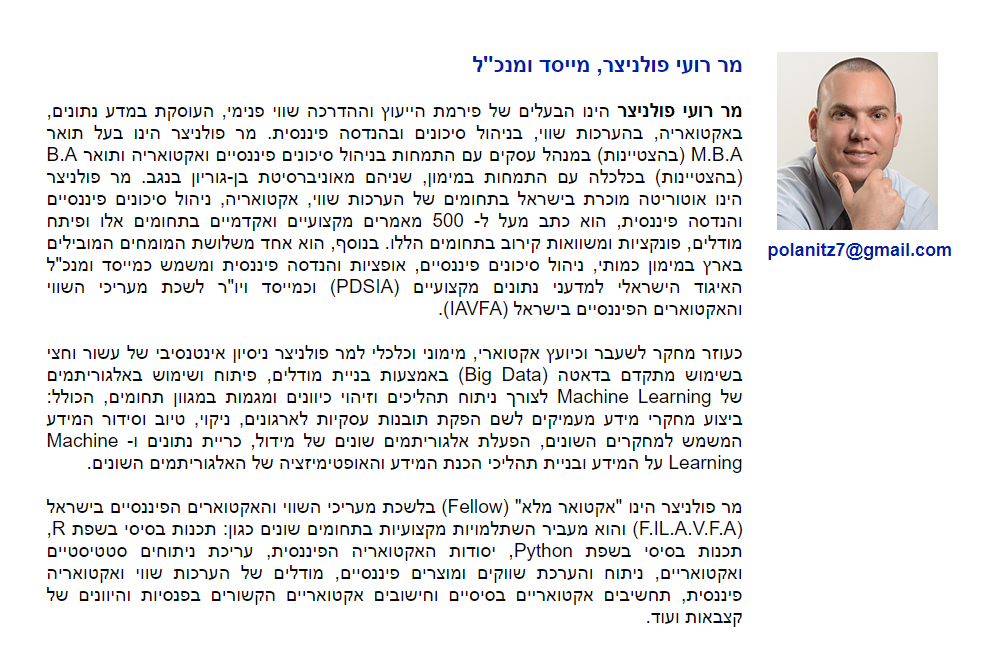

In [1]:
from IPython.display import Image 
Image(filename='roi123.png')

# Motivation

In order to cluster 71 Neighborhood in the San Francisco Bay Areas, I chose the housing price dataset that was sourced from Bay Area Home Sales Database and Zillow. This dataset was based on the homes sold between January 2013 and December 2015.

# Data Preprocessing

In [2]:
import pandas as pd
sf = pd.read_csv('final_data.csv')

In [3]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  float64
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

In [4]:
sf.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [5]:
sf.drop(sf.columns[[0, 2, 3, 4, 5, 7, 12, 13, 14, 15, 16, 17, 18]], axis=1, inplace=True)

In [6]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11330 non-null  object 
 1   finishedsqft   11330 non-null  float64
 2   lastsoldprice  11330 non-null  float64
 3   latitude       11330 non-null  float64
 4   longitude      11330 non-null  float64
 5   neighborhood   11330 non-null  object 
dtypes: float64(4), object(2)
memory usage: 531.2+ KB


In [7]:
sf.describe()

,finishedsqft,lastsoldprice,latitude,longitude
count,11330.000000,1.133000e+04,11330.000000,11330.000000
mean,1585.420918,1.263928e+06,37.759711,-122.436518
std,921.978245,1.042079e+06,0.025578,0.030743
min,1.000000,5.350000e+02,37.708170,-122.510726
25%,1019.000000,7.292500e+05,37.739286,-122.455157
50%,1362.000000,9.900000e+05,37.760513,-122.432510
75%,1876.000000,1.450000e+06,37.781386,-122.413359
max,27275.000000,2.388900e+07,37.806083,-122.381201


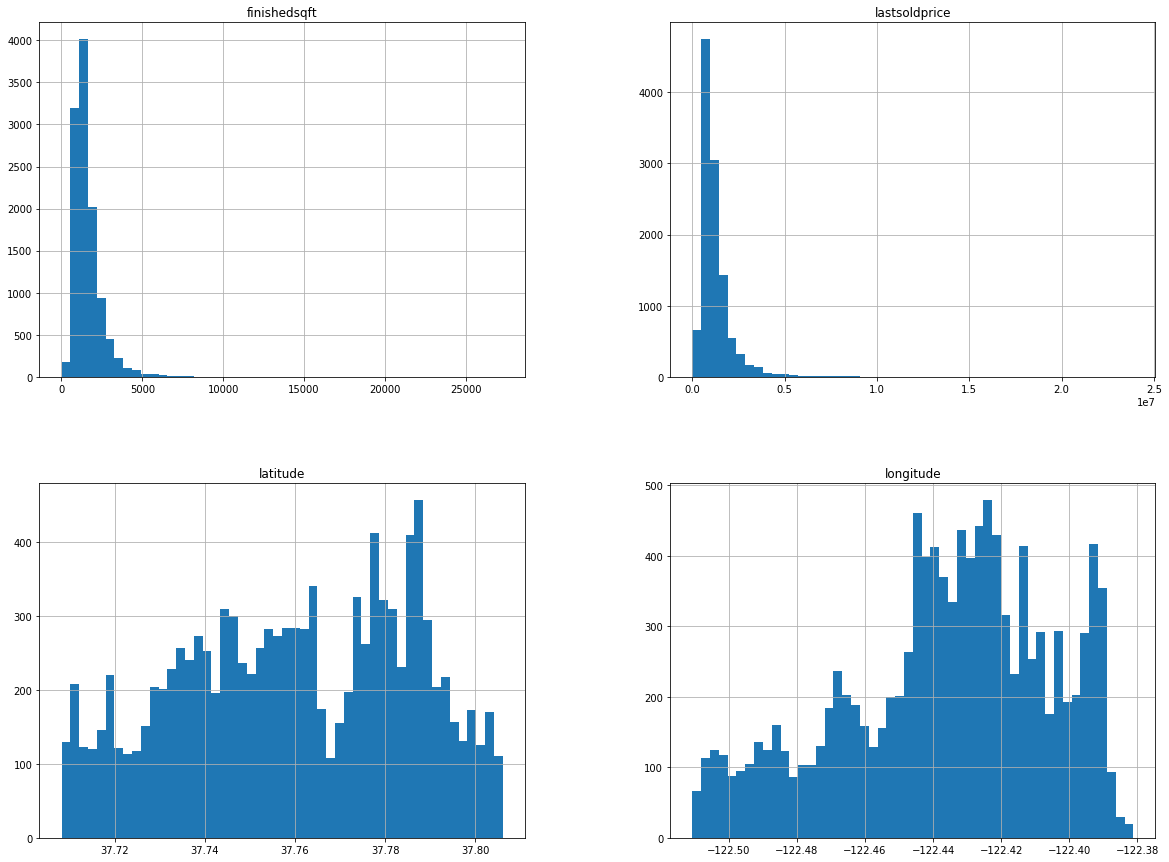

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Observations: 

1. These variables have very different scales. We will discuss this later in this chapter when we explore feature scaling.

2. Many histograms are right skewed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

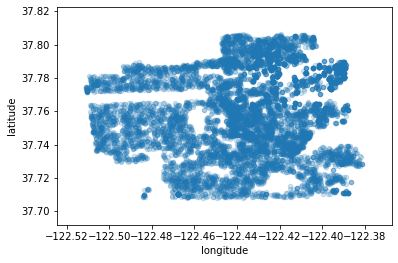

In [9]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

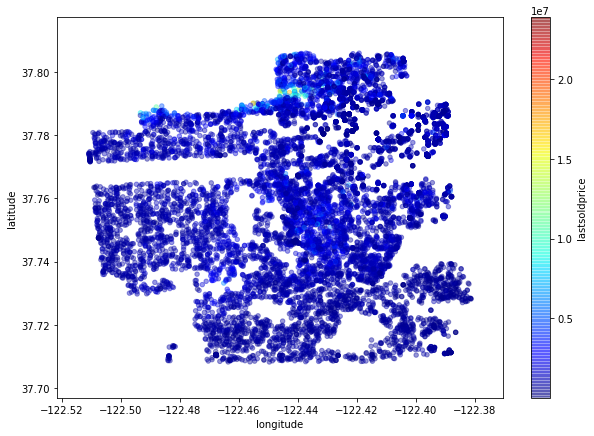

In [10]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

Now let’s look at how much each independent variable correlates with the last sold price.

In [11]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
latitude         0.283107
longitude       -0.052595
Name: lastsoldprice, dtype: float64

The last sold price tends to go up when the finished sqft goes up. 

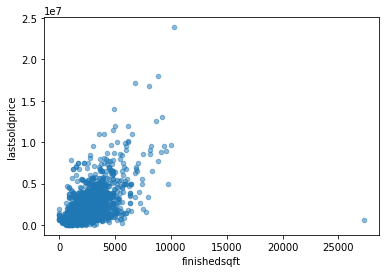

In [12]:
sf.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)
plt.savefig('scatter.png')

First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

# Feature Engineering

Because each neighborhood has the different home price, what we really want is the price per squre foot. So, we add a new variable "price_per_sqft". 

In [13]:
sf['price_per_sqft'] = sf['lastsoldprice']/sf['finishedsqft']

In [14]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
latitude          0.283107
price_per_sqft    0.005008
longitude        -0.052595
Name: lastsoldprice, dtype: float64

Unfortunately, the new price_per_sqft variable has only a very smalll positive correlation with the last sold price. But we still need this varaible for grouping neighborhood.

# Smart Clustering

There are 71 neighborhoods in the data, and we are going to group them.

In [15]:
len(sf['neighborhood'].value_counts())

71

The following steps cluster the neighborhood into three groups: 
1. low price; 
2. high price low frequency; 
3. high price high frequency.

In [16]:
freq = sf.groupby('neighborhood').count()['address']
#mean_price: average price per sqft
mean = sf.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index

In [17]:
cluster.columns = ['freq', 'price_per_sqft','neighborhood']

In [18]:
p = cluster.describe()
p

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


In [19]:
p.iloc[5,:]

freq              123.000000
price_per_sqft    756.246284
Name: 50%, dtype: float64

In [20]:
p.iloc[5,0]

123.0

In [21]:
p.iloc[5,1]

756.246284136123

These are the low price neighborhoods:

In [22]:
cluster1 = cluster[cluster.price_per_sqft < p.iloc[5,1]]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

These are the high price and low frequency neighborhoods:

In [23]:
cluster_temp = cluster[cluster.price_per_sqft >= p.iloc[5,1]]
cluster2 = cluster_temp[cluster_temp.freq < p.iloc[5,0]]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

These are the high price and high frequency neighborhoods:

In [24]:
cluster3 = cluster_temp[cluster_temp.freq >= p.iloc[5,0]]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

Add group column based on the clusters

In [25]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
sf['group'] = sf.neighborhood.apply(get_group)

Now let's preprocess the categorical input feature, usecode

In [26]:
sf.head()

,address,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,price_per_sqft,group
0,Address: 1160 Mission Street #2007,1043.0,1300000.0,37.778705,-122.412635,South of Market,1246.404602,high_price_high_freq
1,Address: 260 King Street #475,903.0,750000.0,37.777641,-122.393417,South of Market,830.564784,high_price_high_freq
2,Address: 560 Missouri Street #B,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,1049.122807,high_price_high_freq
3,Address: 350 Missouri Street,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,1210.219632,high_price_high_freq
4,Address: 3658 Folsom Street,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,1176.923077,high_price_high_freq


In [27]:
sf.drop(sf.columns[[0, 1, 2, 3, 4, 6]], axis=1, inplace=True)
sf.head()

,neighborhood,group
0,South of Market,high_price_high_freq
1,South of Market,high_price_high_freq
2,Potrero Hill,high_price_high_freq
3,Potrero Hill,high_price_high_freq
4,Bernal Heights,high_price_high_freq


Create dummy variables for two categorical variables.

In [28]:
X = sf[['neighborhood', 'group']]
n = pd.get_dummies(sf.group)
X = pd.concat([X, n], axis=1)
X

,neighborhood,group,high_price_high_freq,high_price_low_freq,low_price
0,South of Market,high_price_high_freq,1,0,0
1,South of Market,high_price_high_freq,1,0,0
2,Potrero Hill,high_price_high_freq,1,0,0
3,Potrero Hill,high_price_high_freq,1,0,0
4,Bernal Heights,high_price_high_freq,1,0,0
...,...,...,...,...,...
11325,Glen Park,high_price_high_freq,1,0,0
11326,South of Market,high_price_high_freq,1,0,0
11327,Outer Mission,low_price,0,0,1
11328,Outer Sunset,low_price,0,0,1
